### Hough Transform

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

project_dir = '/root/projects/study_projects/MUIV/cv_course/seminars'
modul_dir = project_dir + "/module02"

(<Axes: >, <matplotlib.image.AxesImage at 0x7c29caac0040>)

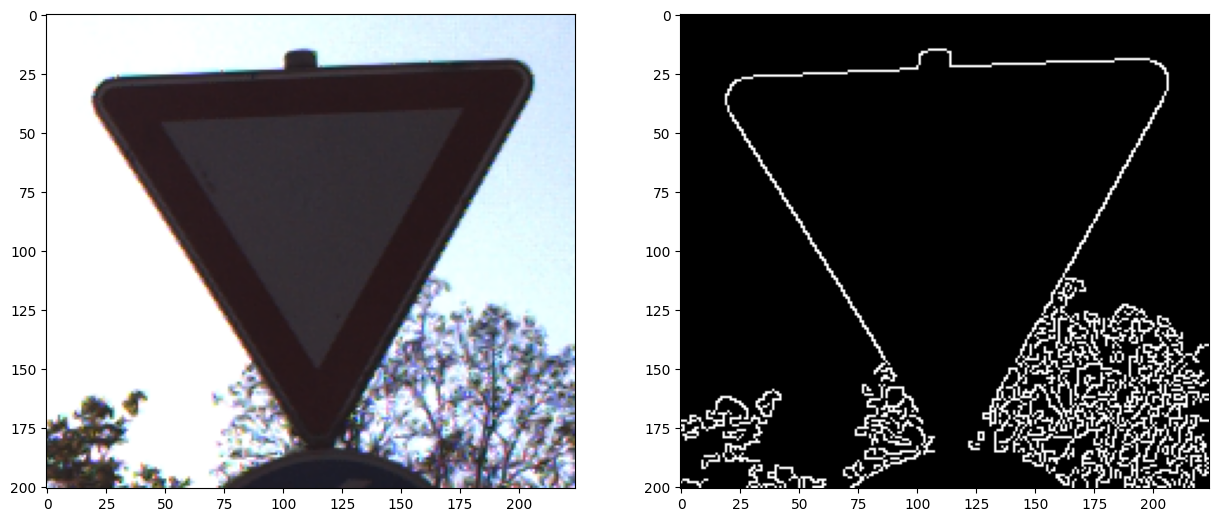

In [ ]:
# Чтение и преобразование изображения
img = cv2.imread(f"{modul_dir}/data/yield.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, threshold1=100, threshold2=550)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(edges, cmap='gray')

# Создание маски для отрисовки линий
hough = np.zeros_like(edges)


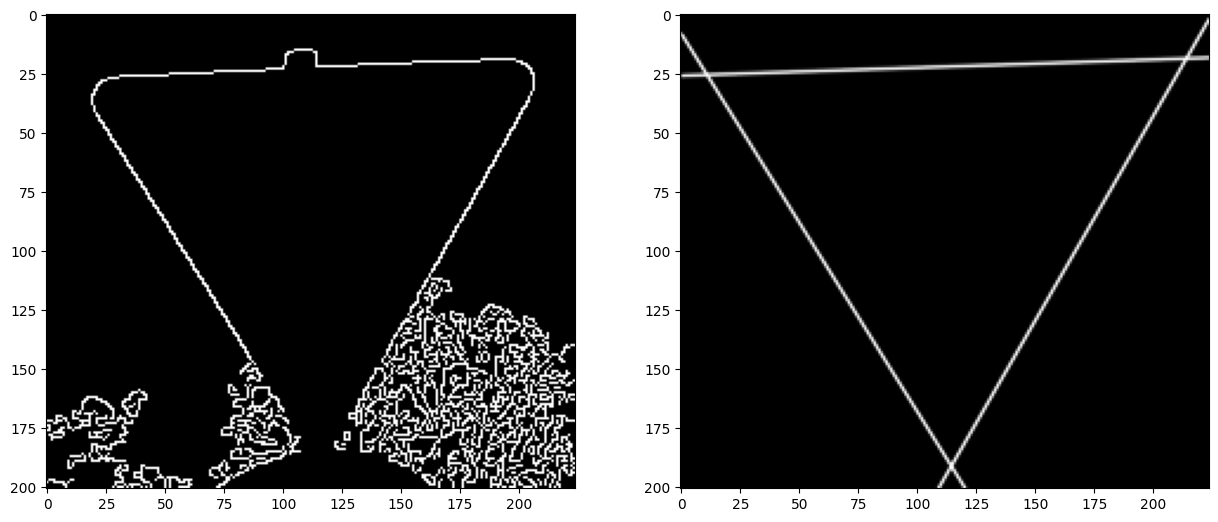

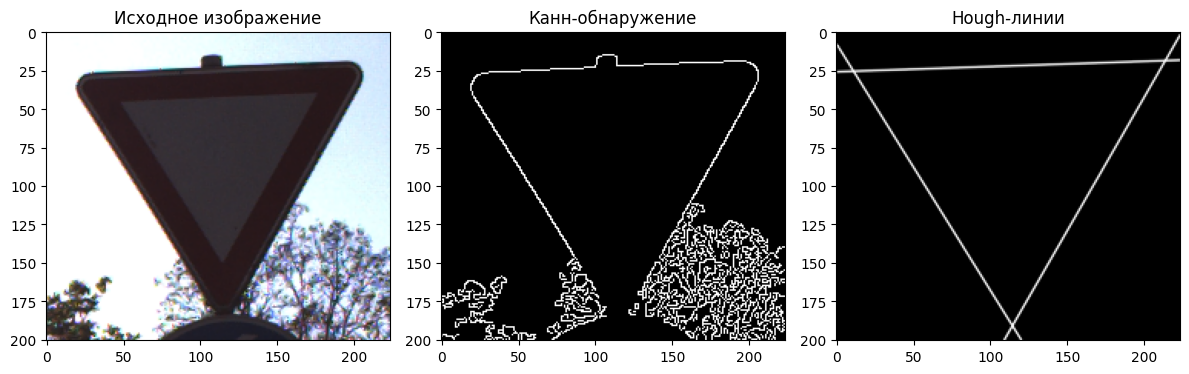

In [8]:
# Создание маски для отрисовки линий
hough = np.zeros_like(edges)
# Обнаружение линий с помощью Hough Transform
lines = cv2.HoughLines(edges, rho=1, theta=2*np.pi/180, threshold=50)

# Отрисовка первых 3 обнаруженных линий
for i in range(0, min(3, len(lines))):  # Предотвращаем выход за границы
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(hough, pt1, pt2, 255, 1, cv2.LINE_AA)

plt.subplot(121), plt.imshow(edges, cmap='gray')
plt.subplot(122), plt.imshow(hough, cmap='gray')

# Отображение результатов
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(img), plt.title("Исходное изображение")
plt.subplot(132), plt.imshow(edges, cmap='gray'), plt.title("Канн-обнаружение")
plt.subplot(133), plt.imshow(hough, cmap='gray'), plt.title("Hough-линии")
plt.tight_layout()
plt.show()